<h1 align = "center">Deep Learning - Prediction of Handwritten Digits</h1>

![](https://wallpaperbat.com/img/109996-machine-learning-wallpaper.jpg)

# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">Introduction 📖</p></div>
The main motivation behind creating this kernel was so I could explore more about the field of <strong>deep learning</strong>. In this kernel I'll try to explain some of the concepts I learnt and how they can be applied for our problem statement of identifying digits. We will explore neural networks in Python and then try to implement them using <strong>TensorFlow</strong> and <strong>Keras</strong>.

### What is Tensorflow ?

TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

<img src = "https://149695847.v2.pressablecdn.com/wp-content/uploads/2019/06/tf_logo_social.png" width = "250">

### What is Keras ?

Keras is a deep learning API written in Python, running on top of the machine learning platform `TensorFlow`. It was developed with a focus on enabling fast experimentation.

<img src = "https://miro.medium.com/max/600/1*DKu_54iqz6C-p6ndo7rO3g.png" width = "200" height = "200">

# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">Imports</p></div>

In [1]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import matplotlib.pyplot as plt
import seaborn as sns
import random

from IPython.display import YouTubeVideo

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

import cv2

import warnings
warnings.filterwarnings('ignore')

# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">The Basics</p></div>
<div class="alert alert-info">
Before we can start classifying our digits, lets try and understand some of the most basic things about deep learning.
<ul>
    <li>What is a Tensor ?</li>
    <li>What is a Neural Network ?</li>
    <li>The Perceptron</li>
</ul>
</div>

# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">What is a Tensor ?</p></div>
**`Tensor`**: I've seen many complex definitions of tensors on Google and this was the simplest one I could find. A tensor is a container which can house data in N dimensions.

<img src = "https://qph.fs.quoracdn.net/main-qimg-8a42228263b908bec0de477a66c0f83e" width = 350 height = 400>

Some of the common terms associated with `tensors` are:
 - `Rank`: It is defined as the number of dimensions of that tensor.
 - `Shape`: It represents the size of the each dimension.
 - `Data-type`: Type of data contained in the tensor, such as `int32`, `int64`, `float32`, `float64`, etc.

Lets take a look at creating tensors and then explore some of the operations we can perform with them.

In [2]:
# 1D tensor
a = tf.constant([0, 1, 2, 3])
print(a, '\n')

# 2D tensor
b = tf.constant([[0, 1],
                [2, 3],
                [4, 5]])
print(b, '\n')

# 3D tensor
c = tf.constant([[[0, 1, 2, 3, 4],
                   [5, 6, 7, 8, 9]],
                  [[10, 11, 12, 13, 14],
                   [15, 16, 17, 18, 19]],
                  [[20, 21, 22, 23, 24],
                   [25, 26, 27, 28, 29]]])
print(c)

tf.Tensor([0 1 2 3], shape=(4,), dtype=int32) 

tf.Tensor(
[[0 1]
 [2 3]
 [4 5]], shape=(3, 2), dtype=int32) 

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


If we try to visualize the 3D tensor the break down would look like this:

<img src = "https://www.tensorflow.org/guide/images/tensor/3-axis_front.png" width = 300>

Higher dimensional tensors might be a bit tough to understand through code, so lets look at a visualization of what they look like:

<img src = "https://www.cc.gatech.edu/~san37/img/dl/tensor.png" width = 500 height = 500>

# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">Tensor Operations</p></div>

Let's take a look at a few operations that can be performed using `tensors`

In [3]:
# add two tensors
print(tf.add(5, 5), '\n')

# square the tensor
print(tf.square(10), '\n')

# adds all the tensors
print(tf.reduce_sum([5, 10, 100]), '\n')

t1 = tf.constant([[4, 5],
                 [9, 10]])
t2 = tf.constant([[3, 1],
                 [15, 8]])

# add 'n' tensors 
print(tf.math.add_n([t1, t2, t2]), '\n')

# subtract the tensors
print(tf.subtract(t1, t2), '\n')

t3 = tf.constant([[1.5, 8],
                 [16, 20]])
t4 = tf.constant([[3.0, 4],
                 [10, 25]])

# multiply tensors
print(tf.multiply(t3, t4), '\n')

# divide the tensors
print(tf.divide(t3, t4), '\n')

tf.Tensor(10, shape=(), dtype=int32) 

tf.Tensor(100, shape=(), dtype=int32) 

tf.Tensor(115, shape=(), dtype=int32) 

tf.Tensor(
[[10  7]
 [39 26]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[ 1  4]
 [-6  2]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[  4.5  32. ]
 [160.  500. ]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[0.5 2. ]
 [1.6 0.8]], shape=(2, 2), dtype=float32) 



# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">What is a Neural Network ?</p></div>

Neural Networks (NNs) are one of the most important aspects of deep learning. [Neural Networks are a set of algorithms inspired by neurons in the human brain.](https://purnasaigudikandula.medium.com/a-beginner-intro-to-neural-networks-543267bda3c8)

Apart from this blog post, I found a few YouTube videos that explain what a neural network is. Definitely worth checking them out !!

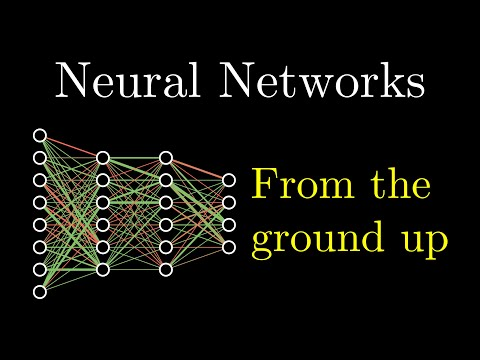

In [4]:
YouTubeVideo('aircAruvnKk', width = 700, height = 500)

<div class="alert alert-block alert-info">
    A few more helpful videos on this topic:
    <ul>
        <li><a href='https://www.youtube.com/watch?v=IHZwWFHWa-w'>How Neural Networks Learn ?</a></li>
        <li><a href='https://www.youtube.com/watch?v=Ilg3gGewQ5U&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=3'>Backpropogation</a></li>
        <li><a href='https://www.youtube.com/watch?v=tIeHLnjs5U8&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=4'>Math Behind Backpropogation</a></li>
    </ul>
</div>

# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">The Perceptron</p></div>

A perceptron is the basic unit of a neural network. It has only 1 layer. A perceptron consists of input values, weights, a bias, a weighted sum and activation function. This is what a **Perceptron** looks like:
<img src = "https://cdn-images-1.medium.com/max/624/1*1Fvs7xlgf1p_D_EZmm5_vg.png" width = 600>

It might seem a bit intimidating at first so lets break it down it smaller parts and understand what each part of a <i>Perceptron</i> really means.
> - `Weights`: In simple terms weights decide how much influence the input will have on the output.
> - `Bias`: Basically it is a constant value. Bias allows you to shift the activation function by adding a constant. 
> - `Weighted Sum`: It can be expressed according to this formula:<br>
<img src = "https://miro.medium.com/max/875/1*sA1AswVFReH7M6zAoBGFzg.png" width = 300>
> - `Activation Function`: An Activation Function decides whether a neuron should be activated or not. Some of the most popular activation functions are:
    <ol>
        <li><b>Sigmoid</b>: It is especially used for models where we have to predict the probability as an output. Since probability of anything exists only between               the range of 0 and 1, sigmoid is a good choice.
            <img src = "https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png" width = 500>
        </li>
        <li><b>ReLU (Rectified Linear Unit) </b>: It will output the input directly if it is positive, otherwise, it will output zero. This is what it looks like:-
            <p><img src = "https://analyticsindiamag.com/wp-content/uploads/2018/01/relu-activation-function-1.png" width = 500></p>
        </li>
        <li><b>Leaky ReLU</b>: It is a type of activation function based on a ReLU, that has a small slope for negative values instead of a flat slope.
            <p><img src = "https://www.researchgate.net/profile/Stefano-Romanazzi/publication/325226633/figure/fig9/AS:627667623768071@1526659031098/Plot-of-the-                                 LeakyReLU-function.png" width = 500></p>
        </li>
        <li><b>Tanh</b>: The function takes any real value as input and outputs values in the range -1 to 1.<br>
            <img src = "https://www.researchgate.net/publication/340644173/figure/fig2/AS:880423089491969@1586920630956/3a-Graph-of-the-tanh-function-3b-Graph-of-gradient-of-tanh-function.ppm" width = 450>
        </li>
    </ol>
    
# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">Feed Forward Neural Networks (FFNN)</p></div>
In a feed forward neural network information flows only in **one direction**. It is one of the simplest forms of a neural network. It is a **Multi-Layered Perceptron (MLP)** as it is composed of multiple perceptrons. The opposite of a Feed Forward Neural Network is a **Recurrent Neural Network**, in which certain pathways are cycled.

<img src = "https://miro.medium.com/proxy/1*By-gx36gxOgfXa37zZCbSw.png">

Data enters at the inputs and passes through the network, layer by layer until it arrives at the output. During normal operation there is no feedback between the layers of the neural network.

The FFNN is the above example has the following architecture:
> - 1 input layer with 4 neurons that accept inputs `x1`, `x2`, `x3` and `x4`
> - 1<sup>st</sup> hidden layer with 4 neurons
> - 2<sup>nd</sup> hidden layer with 5 neurons
> - 3<sup>rd</sup> hidden layer with 6 neurons
> - 4<sup>th</sup> hidden layer with 4 neurons
> - 5<sup>th</sup> hidden layer with 3 neurons
> - 1 output layer with 3 ouputs `y1`, `y2` and `y3`

Since every neuron in a layer is connected to every other neuron in the next layer it is a <i>Fully Connected Neural Network (FCNN)</i>.

**Note**: Any neural network with more than 1 hidden layer is considered to be a **<i>Deep Neural Network</i>**.

# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">MNIST Dataset</p></div>
The MNIST (Modified National Institute of Standards and Technology) dataset for deep learning is like Titanic for machine learning. It is one of the simplest and easiest datasets to get started with deep learning and neural networks.

In [5]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


Taking a look at our data

In [6]:
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
print(train_df)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

Lets take a look at missing values in the MNIST dataset

In [7]:
print(train_df.isna().sum())

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


Fortunately there are no missing values present in the dataset.

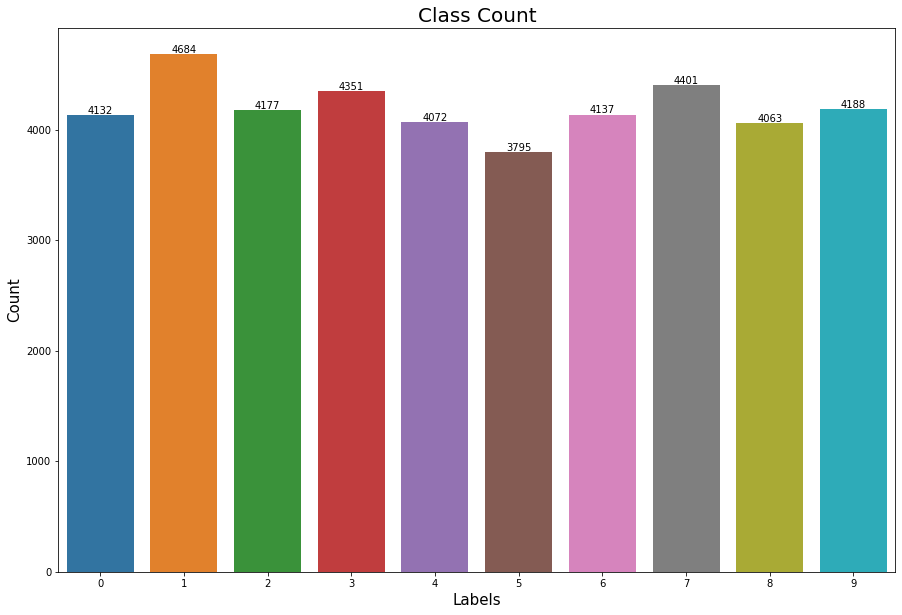

In [8]:
plt.figure(figsize = (15, 10))
ax = sns.countplot(x = 'label', data = train_df)
plt.title('Class Count', fontsize = 20)
plt.xlabel('Labels', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 10))

The number of images for each class is relatively similar. A huge class imbalance does not exist in the dataset, however there is a minor class imbalance that does exist.

In [9]:
X = train_df.drop(columns = ['label']).values.astype('float32')
y = train_df['label'].values
print(X, '\n')
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

[1 0 1 ... 7 6 9]


# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">Splitting the Data</p></div>
Lets split our dataset using the `train_test_split` function. We set the `test_size` to 10 % of our dataset.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 0)

Lets take a look at the shape of `X_train`

In [11]:
print(X_train, '\n')
print(X_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

(37800, 784)


The number of rows = 42000 - 0.1 * 42000 = 37800<br>
The number of columns = 784

In [12]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)
print(X_train.shape)

(37800, 28, 28)


`X_train` contains 37800 lists, in which each list has 28 sublists with 28 columns. This is a bit tricky to understand so let's take a look at the first list in `X_train`.

In [13]:
X_train[0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  89.,  97., 156.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

`X_train[0]` has 28 sublists that have 28 columns each. The shape has been modified since each image is 28 pixels in width and 28 pixels in height, having 784 pixels in total (28 x 28).

In [14]:
print(y_train)
print(y_train.shape)

[1 7 8 ... 6 8 7]
(37800,)


`y_train` is a single list with 37800 entries

# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">Visualizing the Images</p></div>

Lets take a look at the what the images of our dataset actually look like

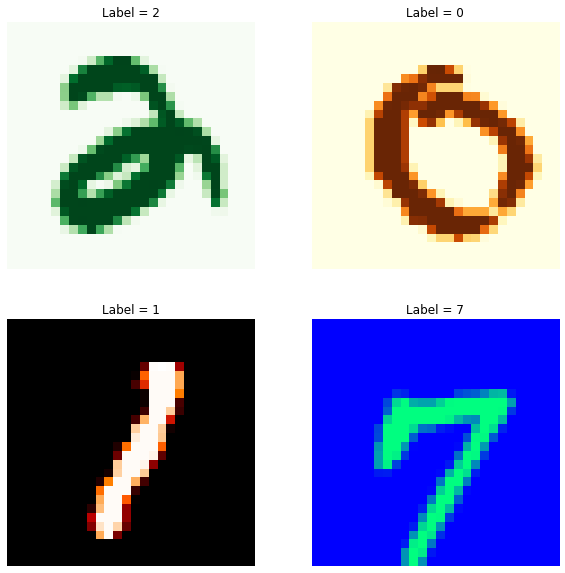

In [15]:
def show_random_images(color1, color2, color3, color4):
    
    '''Randomly prints images from the dataset with different color maps'''

    random_list = []
    for i in range(0, 4):
        random_number = random.randint(0, 37800)
        random_list.append(random_number)

    fig, axes = plt.subplots(2, 2, figsize = (10, 10))

    axes[0, 0].imshow(X_train[random_list[0]], cmap = color1)
    axes[0, 0].set_title('Label = ' + str(y_train[random_list[0]]))
    axes[0, 0].axis('off')

    axes[0, 1].imshow(X_train[random_list[1]], cmap = color2)
    axes[0, 1].set_title('Label = ' + str(y_train[random_list[1]]))
    axes[0, 1].axis('off')

    axes[1, 0].imshow(X_train[random_list[2]], cmap = color3)
    axes[1, 0].set_title('Label = ' + str(y_train[random_list[2]]))
    axes[1, 0].axis('off')

    axes[1, 1].imshow(X_train[random_list[3]], cmap = color4)
    axes[1, 1].set_title('Label = ' + str(y_train[random_list[3]]))
    axes[1, 1].axis('off')

    plt.show()

show_random_images('Greens', 'YlOrBr', 'gist_heat', 'winter')

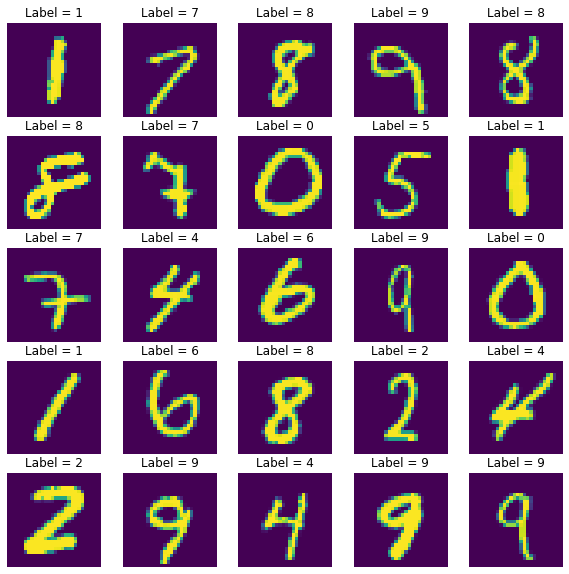

In [16]:
def display_multiple_images(train_or_test, caption, title):
    
    '''Displays the first 25 images of the dataset'''

    r = 5
    c = 5 

    fig = plt.figure(figsize = (10, 10))

    for i in range(r * c): 
        fig.add_subplot(r, c, i + 1)
        plt.imshow(train_or_test[i]) 
        plt.title(caption + ' = ' + str(title[i]))
        plt.axis("off")
        
display_multiple_images(X_train, 'Label', y_train)

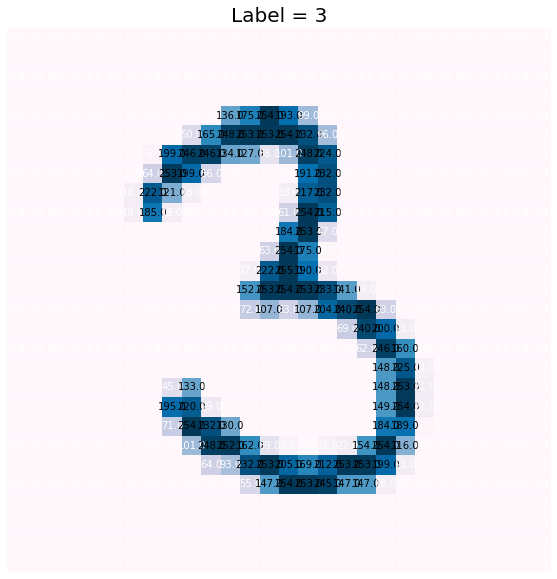

In [17]:
def images_and_pixels(image, ax):
    
    '''Displays a random image along with its pixel values'''
    
    ax.imshow(image, cmap = 'PuBu')
    width, height = image.shape
    threshold = image.max() / 2.5
    
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(image[x][y],2)), 
                        xy = (y,x),
                        horizontalalignment = 'center',
                        verticalalignment = 'center',
                        color = 'white' if image[x][y] < threshold else 'black')

fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
random_number = random.randint(0, 37800)

images_and_pixels(X_train[random_number], ax)

plt.title('Label = ' + str(y_train[random_number]), fontsize = 20)
plt.axis('off')
plt.show()

In [18]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train.shape)
print(X_test.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)


# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">CNN (Convolutional Neural Network)</p></div>

A convolutional neural network is a class of deep neural networks, most commonly applied to analyze visual imagery. This is what a CNN looks like:

<img src = "https://miro.medium.com/max/1400/1*0NwaOkzvom6YpMZoIgWTiQ.png">

Some of the common terms associated with it are:

> - `Convolution`: It is the first layer to extract features from an input image. It preserves the relationship between pixels by learning image features using small squares of input data. It is a mathematical operation that takes two inputs:
    - An image matrix
    - Filter (or kernel)
> - `Filter`: It is also called a `kernel`. Filters detect spatial patterns such as edges in an image by detecting the change in intensity values of the image. The values of the filters are learned automatically by the neural network through the training process.
    <p><img src = "https://miro.medium.com/max/826/1*4yv0yIH0nVhSOv3AkLUIiw.png"></p>  
> - `Feature Map`: This is also called the `Activation Map`. It is the result of the multiplication of the `image matrix` and the `filter`.
    <p><img src = "https://miro.medium.com/max/536/1*MrGSULUtkXc0Ou07QouV8A.gif"></p>
> - `Kernel Size`: It is the size of the `kernel` or the `filter`.
> - `Stride`: It is the number of pixels shifted over the input image.
    <p><img src = "https://miro.medium.com/max/1400/1*ulfFYH5HbWpLTIfuebj5mQ.gif" width = 300 height = 300></p>
    In the above example the image size is 5 x 5, the kernel size is 3 x 3 and the stride is 1.
> - `Padding`: It extends the area of the image which is processed by the CNN. Adding padding to the image processed by the CNN allows for a more accurate analysis of the images.
    <p><img src = "https://upload.wikimedia.org/wikipedia/commons/0/04/Convolution_arithmetic_-_Padding_strides.gif" width = 300 height = 300></p>
> - `Max Pooling`: In `max pooling` the kernel extracts the maximum value of the area it convolves. It is <i>advisable</i> to perform `max pooling` when it is possible to extract some features from our image. It is not recommended to perform this operation in the initial stages of the CNN as the kernels would still be in the process of extracting edges and gradients.
    <p><img src = "https://lh5.googleusercontent.com/jOohqE8T9IYqkir1OzJN2vRdeykH1yGnwEy9oWK85EWf2aP-jg10YZt_3yaVDeCZVS9713QDACk0l1iYX5e5EfE2CUqbSLVaq5UBeGL91a92v3ZMRyb4FLobxjN5pDh4RBc1pT-8" width = 450 height = 450></p>
> - `Batch Normalization`: This allows every layer of the network to do learning more independently. It is used to normalize the output of the previous layers.
> - `Dropout`: This is a technique where randomly selected neurons are ignored during training. They are <i>dropped out</i> randomly. The effect is that the network becomes less sensitive to the specific weights of the neurons. This helps the network **generalize better** and makes it less likely to overfit the data.

In [19]:
model = keras.Sequential([
            keras.Input(shape = (28, 28, 1)),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
            layers.MaxPooling2D(),
            layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
            layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
            layers.Flatten(),
            layers.Dense(128, activation = 'relu'),
            layers.Dense(10, activation = 'softmax'),
])

model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
        optimizer = keras.optimizers.Adam(lr = 1e-4),
        metrics = ['acc'],
)

We have now defined our custom CNN model architecture, but what the **<i>heck</i>** does all this even mean?
> - `Sequential` in Keras allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.
> - `Input` is used to accept the images in our dataset as the input. The shape has to be in the form of `width x height x channel`. Here the width = height = 28 and the number of channels = 1 since it is a blakc and white image. If we wanted to train the model for a colored images we would have set number of channels to 3.  
> - `Conv2D` is the Convolutional layer of our CNN. Once we understand the parameters of the first `Conv2D` layer it will become easy to understand the other convolutional layers as well. The first convolutional layer has:
> > - `filters` = 32
> > - `kernel_size` = 3
> > - `padding = same`: It applies padding to the input image so that the input image gets fully covered by the filter and the specified stride. If the `stride` = 1 then the layer's output will have the same spatial dimensions as its input
> > - `activation = 'relu'` is the activation function for the layer of the CNN
> - `MaxPooling2D` as we saw earlier is used to help the kernel extract the maximum value of the area it convolves.
> - `Flatten` helps you <i>flatten</i> the multi-dimension inputs into a single dimension
> - `Dense` is the fully connected neural network layer. The first `Dense` layer has `units` = 128. This is the same as the number of neurons. It also has the `relu` activation function. It performs the following operation:
> > - `output = activation(dot(input, kernel) + bias)`

Once we have defined the architecture to our CNN we have to `compile` the model. In our case our model is compiled having the following parameters:
> - `loss`: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training. We use `SparseCategoricalCrossentropy` when there are 2 or more classes in our dataset. You can take a look at the different types of loss functions provided by Keras over [here](https://keras.io/api/losses/).
> - `optimizer`: We use the `Adam` optimizer which is an <i>ADAptive Moment (ADAM) Estimation Algorithm</i>. We set the `lr = 1e-4`. The **learning rate** is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated.
> - `metrics` are functions that are used to judge the perfomance of the model. The `acc` metric computes the accuracy rates across all the predictions.

Keras provies a way to looks at the summary of the model using `model.summary()`. The summary is textual and includes information about the layers and their order in the model, the output shape of each layer and the number of parameters (weights) in each layer.

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        3

### Using Learning Rate Reduction

In [21]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.00001)

# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">Training the CNN</p></div>

In [22]:
classifier = model.fit(X_train, y_train, batch_size = 64, 
                                 epochs = 50, 
                                 validation_data = (X_test, y_test), 
                                 verbose = 1,
                                 steps_per_epoch = X_train.shape[0] // 64,
                                 callbacks = [reduce_lr])

Epoch 1/50
590/590 [==============================] - 11s 7ms/step - loss: 0.2120 - acc: 0.9363 - val_loss: 0.0843 - val_acc: 0.9750
Epoch 2/50
590/590 [==============================] - 4s 7ms/step - loss: 0.0529 - acc: 0.9831 - val_loss: 0.0660 - val_acc: 0.9814
Epoch 3/50
590/590 [==============================] - 4s 6ms/step - loss: 0.0332 - acc: 0.9899 - val_loss: 0.0565 - val_acc: 0.9831
Epoch 4/50
590/590 [==============================] - 4s 6ms/step - loss: 0.0242 - acc: 0.9924 - val_loss: 0.0569 - val_acc: 0.9826
Epoch 5/50
590/590 [==============================] - 4s 7ms/step - loss: 0.0178 - acc: 0.9942 - val_loss: 0.0645 - val_acc: 0.9833
Epoch 6/50
590/590 [==============================] - 4s 6ms/step - loss: 0.0145 - acc: 0.9951 - val_loss: 0.0819 - val_acc: 0.9802
Epoch 7/50
590/590 [==============================] - 4s 6ms/step - loss: 0.0118 - acc: 0.9966 - val_loss: 0.0591 - val_acc: 0.9860
Epoch 8/50
590/590 [==============================] - 4s 7ms/step - loss: 0

# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">Visualizing CNN Layers</p></div>
Lets visualize the layers of our model and take a look at what our CNN is learning.

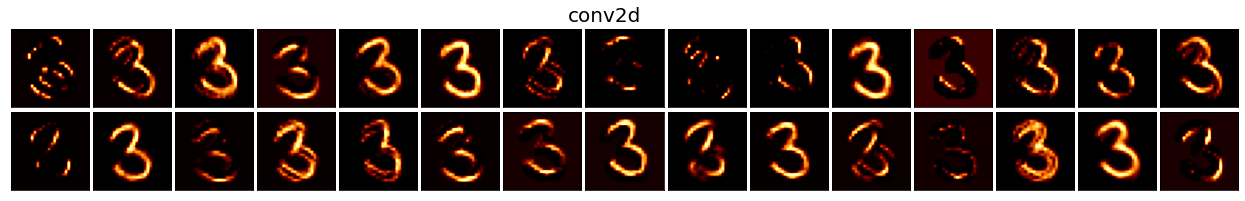

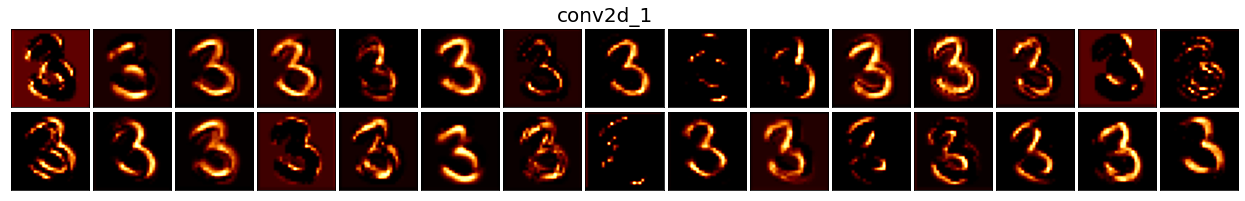

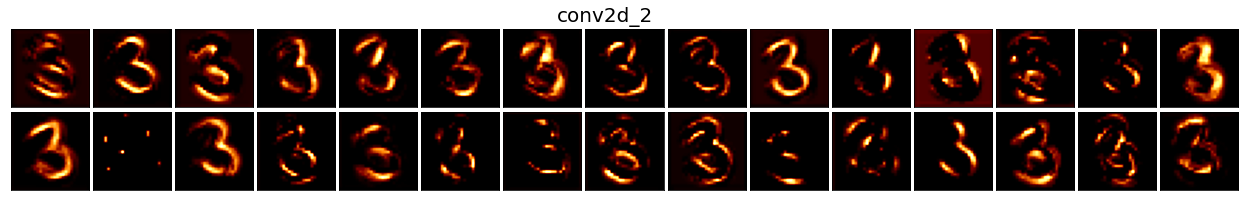

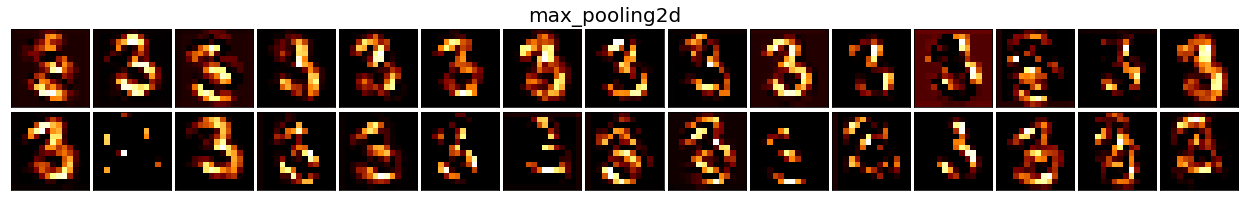

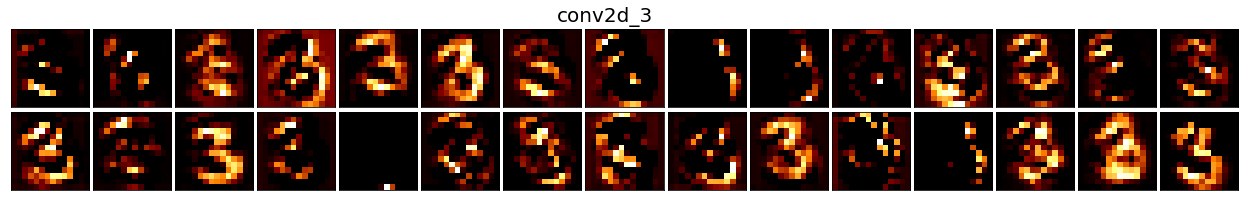

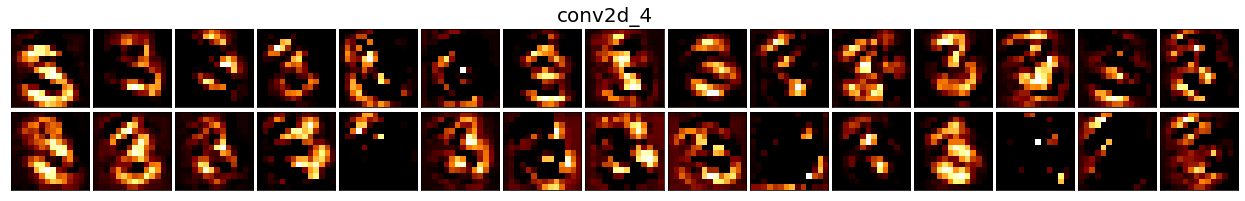

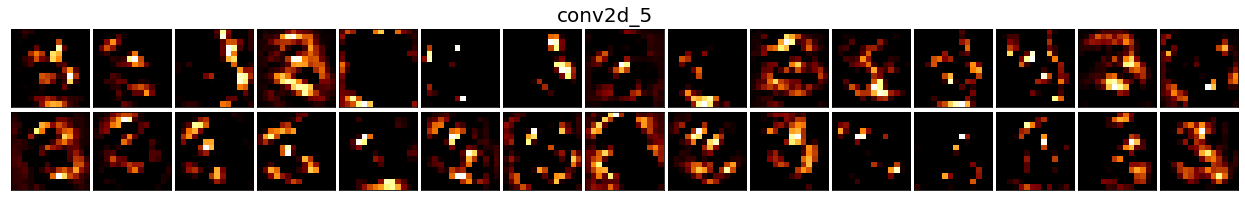

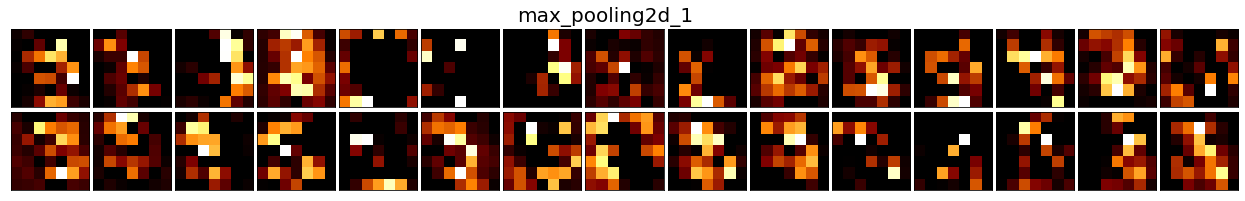

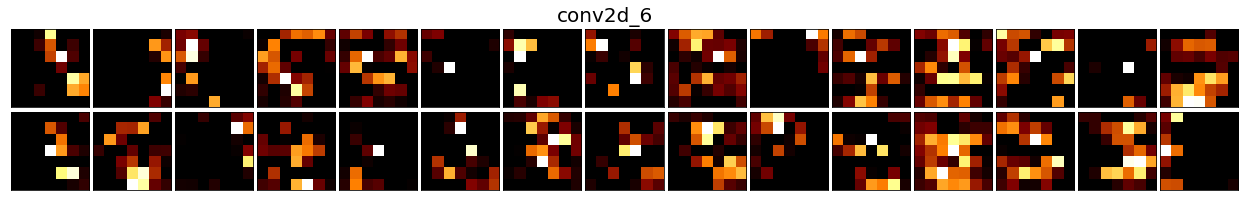

In [23]:
def CNN_layer_visualizer():
    
    layer_names = [layer.name for layer in model.layers]
    layer_outputs = [layer.output for layer in model.layers]
    
    activation_model = Model(inputs = model.input, outputs = layer_outputs)
    input = X_train[random_number]
    activations = activation_model.predict(input.reshape(-1, 28, 28, 1) / 255.0)
    
    for number in range(len(layer_names) - 4):
        fig = plt.figure(figsize = (22, 3))
        for img in range(30):
            ax = fig.add_subplot(2, 15, img + 1)
            ax = plt.imshow(activations[number][0, :, :, img], cmap = 'afmhot')
            main_title = fig.suptitle(str(layer_names[number]), fontsize = 20)
            plt.xticks([])
            plt.yticks([])
            fig.subplots_adjust(wspace = 0.05, hspace = 0.05)
            
CNN_layer_visualizer()

# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">Model Performance</p></div>

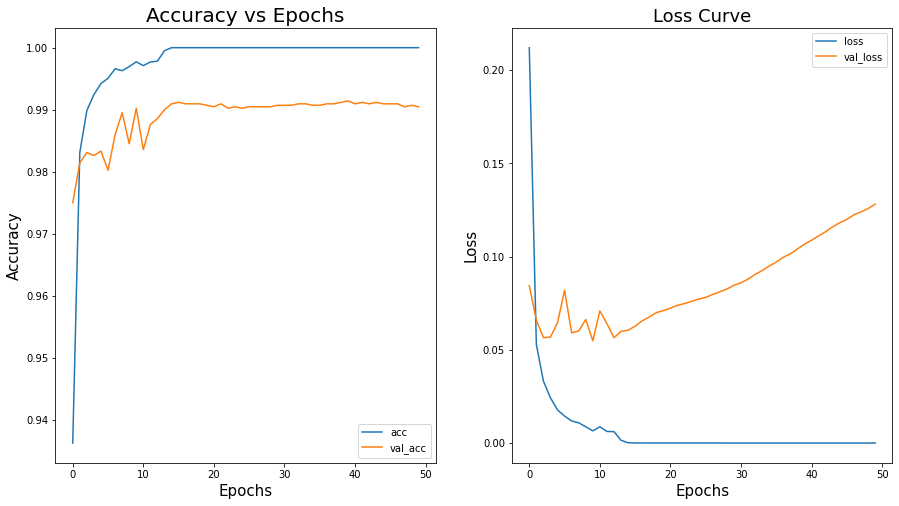

In [24]:
def model_performance_graphs():
    
    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(classifier.epoch, classifier.history['acc'], label = 'acc')
    axes[0].plot(classifier.epoch, classifier.history['val_acc'], label = 'val_acc')
    axes[0].set_title('Accuracy vs Epochs', fontsize = 20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(classifier.epoch, classifier.history['loss'], label = 'loss')
    axes[1].plot(classifier.epoch, classifier.history['val_loss'], label="val_loss")
    axes[1].set_title("Loss Curve",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()

    plt.show()
    
model_performance_graphs()

Evaluating the performance of our model on the training set

In [25]:
model.evaluate(X_train, y_train, batch_size = 64, verbose = 1)

591/591 [==============================] - 2s 3ms/step - loss: 4.3142e-09 - acc: 1.0000


[4.314239632208228e-09, 1.0]

Evaluating the performance of our model on the testing set

In [26]:
model.evaluate(X_test, y_test, batch_size = 64, verbose = 1)

66/66 [==============================] - 0s 3ms/step - loss: 0.1281 - acc: 0.9905


[0.1281183511018753, 0.9904761910438538]

Making the predictions using our trained model

In [27]:
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
final_labels = model.predict(((test_df.values).reshape(-1, 28, 28, 1) / 255.0))
final_labels = np.argmax(final_labels, axis = 1)

Lets see how well our predictions match up with the images from `test_df`

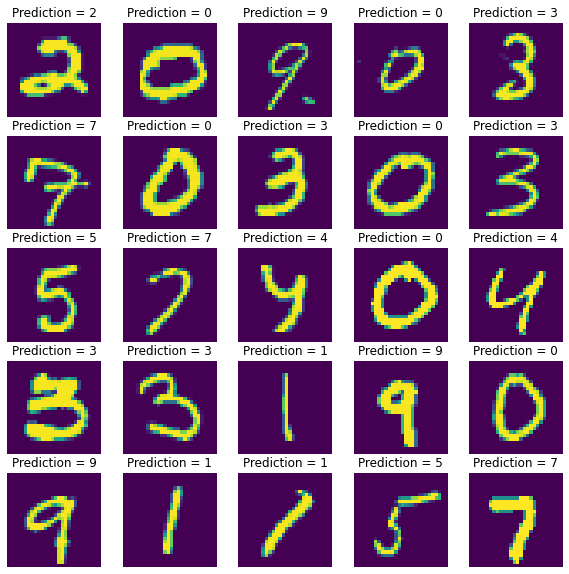

In [28]:
display_multiple_images(test_df.values.reshape(-1, 28, 28, 1), 'Prediction', final_labels)

# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">Building 10 CNNs</p></div>

In [29]:
n = 10
new_models = [0] * n

for i in range(n):
    new_models[i] = keras.Sequential([
                    keras.Input(shape = (28, 28, 1)),
                    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
                    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
                    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
                    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
                    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
                    layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
                    layers.Flatten(),
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(10, activation = 'softmax'),
    ])

    new_models[i].compile(
                  loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                  optimizer = keras.optimizers.Adam(lr = 1e-4),
                  metrics = ['acc'],
            )

In [30]:
history = [0] * n
for i in range(n):
    history[i] = new_models[i].fit(X_train, y_train, batch_size = 64, 
                                   epochs = 50, 
                                   validation_data = (X_test, y_test), 
                                   verbose = 1,
                                   steps_per_epoch = X_train.shape[0] // 64,
                                   callbacks = [reduce_lr])
    print('Model {model_number}: Epochs = {epochs}: Training Accuracy = {training_accuracy}: Validation Accuracy = {validation_accuracy}'.format(model_number = i + 1,
                                                                                                                                                epochs = 50,
                                                                                                                                                training_accuracy = max(history[i].history['acc']),
                                                                                                                                                validation_accuracy = max(history[i].history['val_acc'])))

Epoch 1/50
590/590 [==============================] - 5s 7ms/step - loss: 0.2221 - acc: 0.9352 - val_loss: 0.0890 - val_acc: 0.9736
Epoch 2/50
590/590 [==============================] - 4s 6ms/step - loss: 0.0558 - acc: 0.9823 - val_loss: 0.0635 - val_acc: 0.9805
Epoch 3/50
590/590 [==============================] - 4s 7ms/step - loss: 0.0364 - acc: 0.9882 - val_loss: 0.0684 - val_acc: 0.9802
Epoch 4/50
590/590 [==============================] - 4s 7ms/step - loss: 0.0275 - acc: 0.9909 - val_loss: 0.0655 - val_acc: 0.9821
Epoch 5/50
590/590 [==============================] - 4s 6ms/step - loss: 0.0209 - acc: 0.9926 - val_loss: 0.0740 - val_acc: 0.9800
Epoch 6/50
590/590 [==============================] - 4s 7ms/step - loss: 0.0171 - acc: 0.9944 - val_loss: 0.0542 - val_acc: 0.9855
Epoch 7/50
590/590 [==============================] - 4s 6ms/step - loss: 0.0143 - acc: 0.9952 - val_loss: 0.0568 - val_acc: 0.9860
Epoch 8/50
590/590 [==============================] - 4s 7ms/step - loss: 0.

# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">Performance of 10 CNNs</p></div>

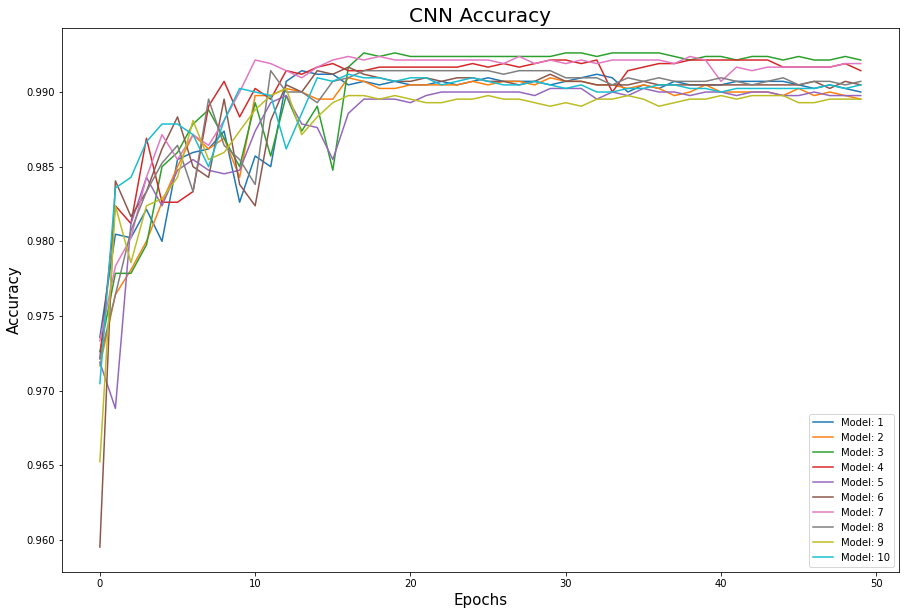

In [31]:
model_nos = ['Model: ' + str(i + 1) for i in range(0, 10)]
plt.figure(figsize = (15, 10))
for i in range(n):
    plt.plot(history[i].history['val_acc'])
plt.title('CNN Accuracy', fontsize = 20)
plt.legend(model_nos, loc = 'lower right')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Accuracy',  fontsize = 15)
plt.show()

# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">Ensemble 10 CNNs</p></div>

In [32]:
new_final_labels = np.zeros((test_df.shape[0], 10))
for i in range(n):
    new_final_labels = new_final_labels + new_models[i].predict(((test_df.values).reshape(-1, 28, 28, 1) / 255.0))
new_final_labels = np.argmax(new_final_labels, axis = 1)

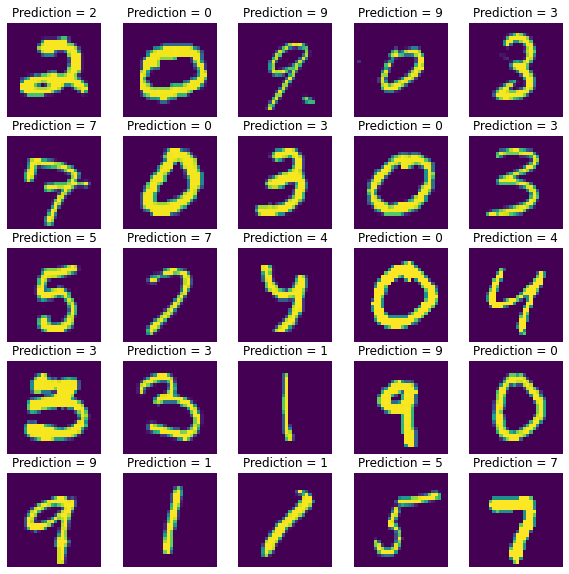

In [33]:
display_multiple_images(test_df.values.reshape(-1, 28, 28, 1), 'Prediction', new_final_labels)

# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">Creating the Submission File</p></div>

In [34]:
submission_df = pd.DataFrame()
image_id = [i for i in range(1, 28001)]
submission_df['ImageId'] = image_id
submission_df['Label'] = new_final_labels
submission_df.to_csv('submission.csv', index = False)
submission_df.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


# <div style = "color:white; display:fill; border-radius:10px; background-color:#9A9A9A; letter-spacing:0.5px; overflow:hidden"><p style = "padding:20px; color:white; overflow:hidden; margin:0; font-size:110%">References</p></div>

> - https://www.kaggle.com/code/cdeotte/25-million-images-0-99757-mnist/notebook
> - https://www.kaggle.com/code/anktplwl91/visualizing-what-your-convnet-learns/notebook
> - https://www.kaggle.com/code/aishwarya2210/prediction-of-digits-from-handwritten-images
> - https://www.kaggle.com/code/andradaolteanu/how-i-taught-myself-deep-learning-vanilla-nns
> - https://www.kaggle.com/code/andradaolteanu/convolutional-neural-nets-cnns-explained
> - https://www.kaggle.com/code/andradaolteanu/pytorch-rnns-and-lstms-explained-acc-0-99

<div class="alert alert-warning">🚧 Work In Progress 🚧</div>